<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Ploting Data in Qiskit

To use this notebook you need to ensure that you have [maptlotlib](https://matplotlib.org/) installed on your system

In [1]:
from qiskit.tools.visualization import plot_histogram

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer

## Plot histogram

To visualize the data from a quantum circuit run on a real device or `qasm_simulator` we have made a simple function 

`plot_histogram(data)`

As an example we make a 2 qubit Bell state

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

# quantum circuit to make a Bell state 
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])

meas = QuantumCircuit(q,c)
meas.measure(q, c)

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell+meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 519, '11': 481}


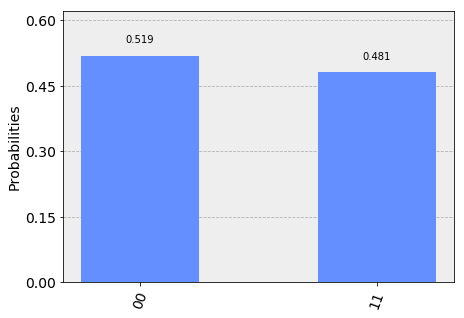

In [4]:
plot_histogram(counts)

### Options when plotting a histogram

The `plot_histogram()` has a few options to adjust the output graph. The first option is the `legend` kwarg. This is used to provide a label for the executions. It takes a list of strings use to label each execution's results. This is mostly useful when plotting multiple execution results in the same histogram. The `sort` kwarg is used to adjust the order the bars in the histogram are rendered. It can be set to either ascending order with `asc` or descending order with `dsc`. The `number_to_keep` kwarg takes an integer for the number of terms to show, the rest are grouped together in a single bar called rest. You can adjust the color of the bars with the `color` kwarg which either takes a string or a list of strings for the colors to use for the bars for each execution. You can adjust whether labels are printed above the bars or not with the `bar_labels` kwarg. The last option available is the `figsize` kwarg which takes a tuple of the size in inches to make the output figure.

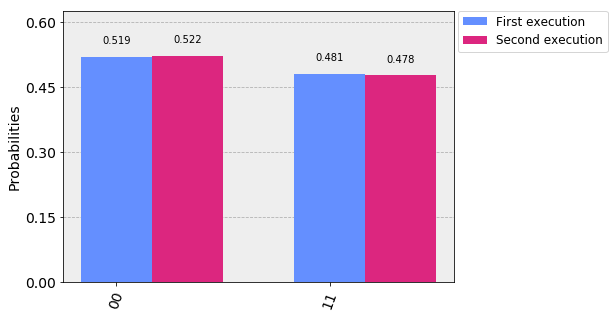

In [5]:
# Execute 2 qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

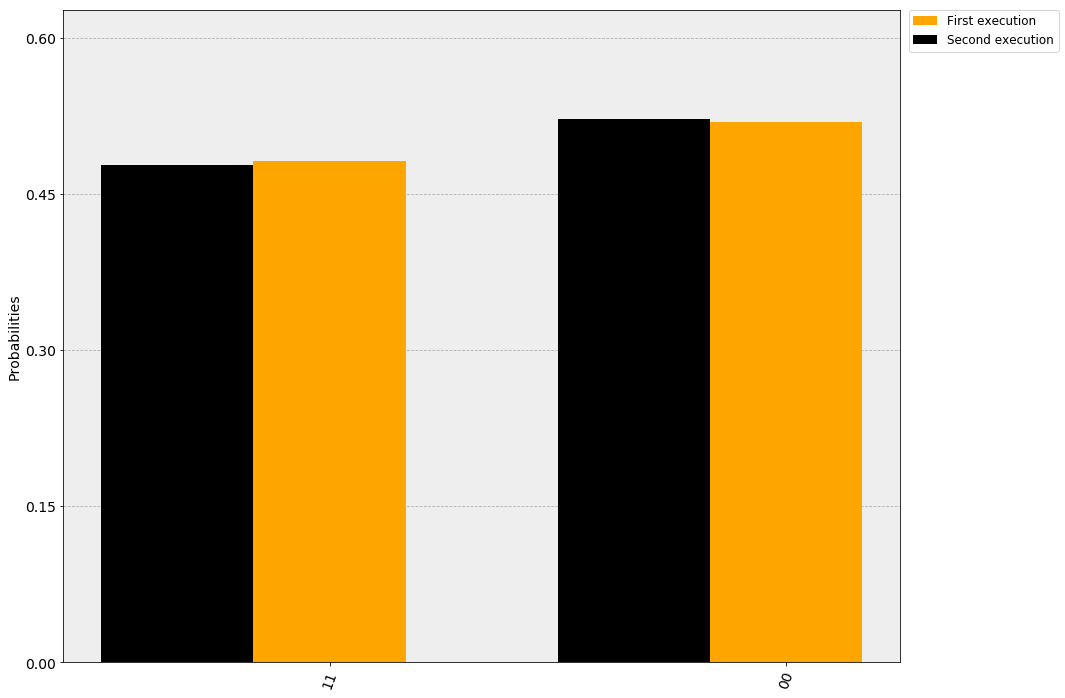

In [6]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12), color=['orange', 'black'], bar_labels=False)

### Using the output from plot_histogram()

When using the plot_histogram() function it returns a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and renders it for us in this tutorial, but when running outside of jupyter you do not have this feature automatically. However, `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object from `plot_histogram()` to open the image in a new window (assuming your configured matplotlib backend is interactive). Or alternatively you can call `.savefig(out.png)` to save the figure to `out.png`. The `savefig()` takes a path so you can just the location and filename where you're saving the output.

## Interactive histogram plots for Jupyter Notebooks.

There is an alternate function for plotting histograms when running in a Jupyter notebook. This function `iplot_histogram()` is made using an externally hosted JS library for use in Jupyter notebooks. The interactive plot can only be used if you're running inside a jupyter notebook and only if you have external connectivity to the host with the JS library. If you use `iplot_histogram()` outside of a jupyter notebook it will fail.

In [7]:
from qiskit.tools.visualization import iplot_histogram

In [8]:
# Run in interactive mode
iplot_histogram(counts)

## Plot State

In many situations you want to see the state of a quantum computer. This could be for debugging. Here we assume you have this state (either from simulation or state tomography) and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. There are several functions for generating different types of visualization of a quantum state

```
plot_state_city(quantum_state)
plot_state_paulivec(quantum_state)
plot_state_qsphere(quantum_state)
plot_state_hinton(quantum_state)
plot_bloch_multivector(quantum_state)
```

A quantum state is either a state matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The state matrix is related to the statevector by 

$$\rho = |\psi\rangle\langle \psi|.$$

And is more general as it can represent mixed states (positive sum of statevectors) 

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$

The visualizations generated by the functions are:
- `'plot_state_city'`: The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city
- `'plot_state_qsphere'`: The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different `'qsphere'` for each component. 
- `'plot_state_paulivec'`: The representation of the state matrix using Pauli operators as the basis $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$
- `'plot_state_hinton'`: Same as `'city'` but with the size of the element represents the value of the matrix element.  
- `'plot_bloch_multivector'`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.  

In [9]:
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere

In [10]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

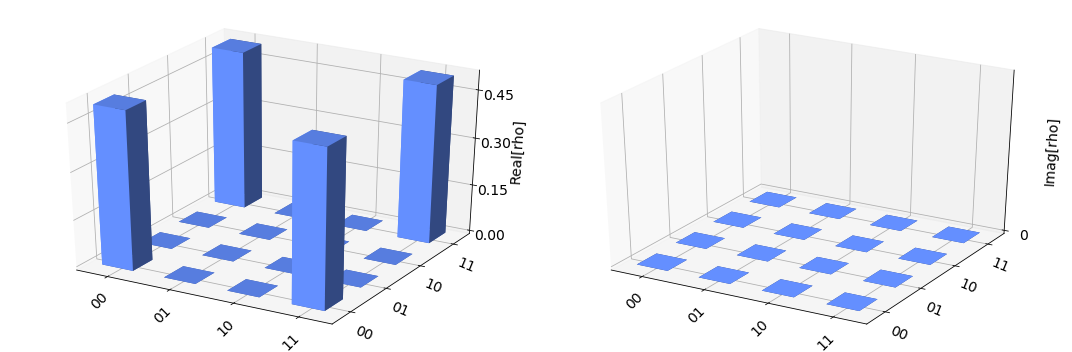

In [11]:
plot_state_city(psi)

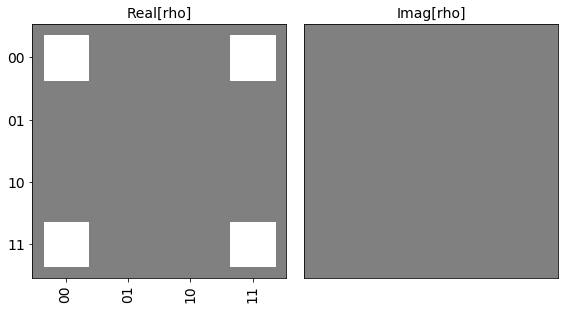

In [12]:
plot_state_hinton(psi)

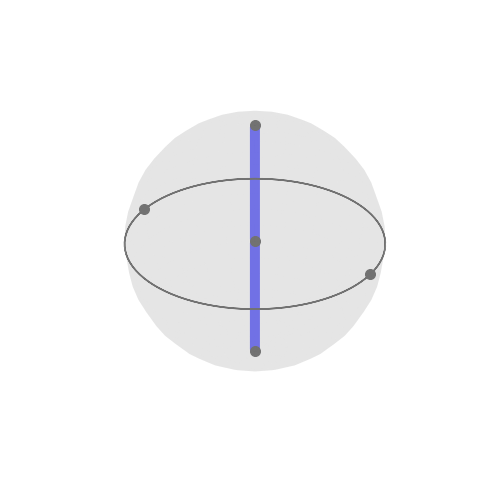

In [13]:
plot_state_qsphere(psi)

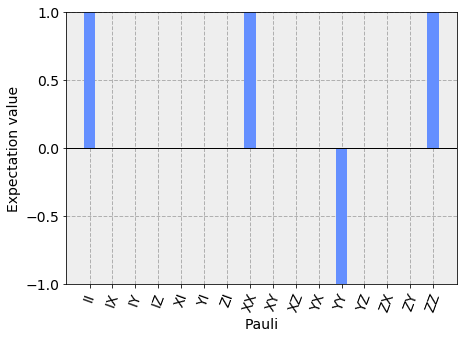

In [14]:
plot_state_paulivec(psi)

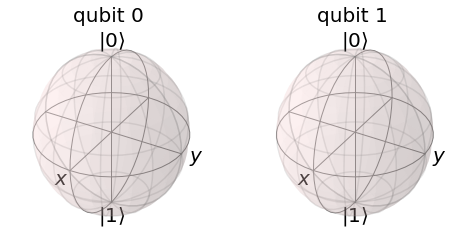

In [15]:
plot_bloch_multivector(psi)

Here we see that there is no information about the quantum state in the single qubit space as all vectors are zero. 

### Options when using state plotting functions

The various functions for plotting quantum state provide a number of options to adjust the how the plots are rendered. Which options depend on the function being used.

**plot_state_city()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height).
- **color** (list): a list of len=2 giving colors for real and imaginary components of matrix elements.

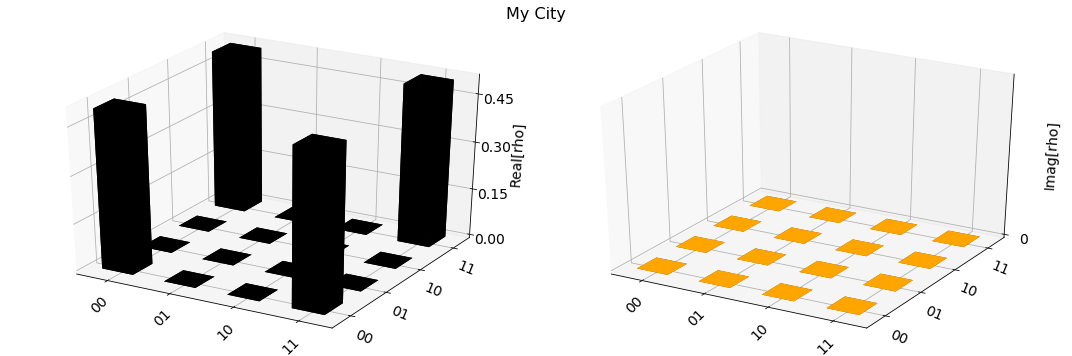

In [16]:
plot_state_city(psi, title="My City", color=['black', 'orange'])

**plot_state_hinton()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height).

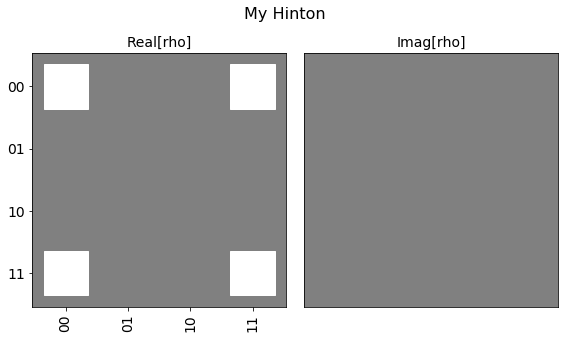

In [17]:
plot_state_hinton(psi, title="My Hinton")

**plot_state_paulivec()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height).
- **color** (list or str): color of the expectation value bars.

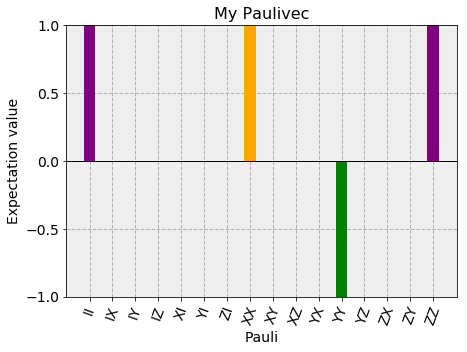

In [18]:
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

**plot_state_qsphere()** options

- **figsize** (tuple): figure size in inches (width, height).

**plot_bloch_multivector()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height).

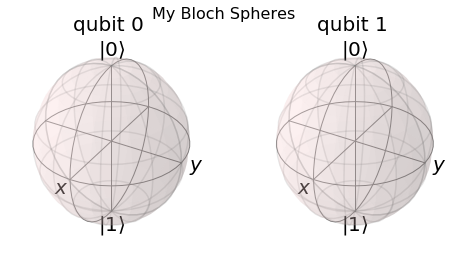

In [19]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

### Using the output from state plotting functions

When using the any of the state plotting functions it returns a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and renders it for us in this tutorial, but when running outside of jupyter you do not have this feature automatically. However, `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Or alternatively you can call `.savefig(out.png)` to save the figure to `out.png` in the current working directory. The `savefig()` takes a path so you can just the location and filename where you're saving the output.

## Interactive State Plots for Jupyter Notebooks

Just like with `plot_histogram()` there is a second set of functions for each of the functions to plot the quantum state. These functions have the same name but with a prepended `i`:

```
iplot_state_city(quantum_state)
iplot_state_paulivec(quantum_state)
iplot_state_qsphere(quantum_state)
iplot_state_hinton(quantum_state)
iplot_bloch_multivector(quantum_state)
```

these functions are made using an externally hosted JS library for use in Jupyter notebooks. The interactive plot can only be used if you're running inside a jupyter notebook and only if you have external connectivity to the host with the JS library. If you use these functions outside of a jupyter notebook it will fail.

In [20]:
from qiskit.tools.visualization import iplot_state_paulivec

In [21]:
# Generate an interactive pauli vector plot
iplot_state_paulivec(psi)

## Plot Bloch Vector

A standard way of plotting a quantum system is using the Bloch vector. This only works for a single qubit and takes as inputs the Bloch vector. 

The Bloch vector is defined as $[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and $\rho$ is the state matrix.


In [22]:
from qiskit.tools.visualization import plot_bloch_vector

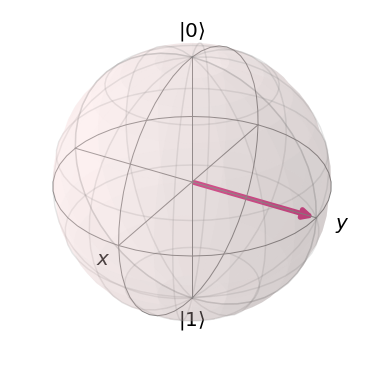

In [23]:
plot_bloch_vector([0,1,0])

### Options for plot_bloch_vector()

- **title** (str): a string that represents the plot title
- **figsize** (tuple): Figure size in inches (width, height).

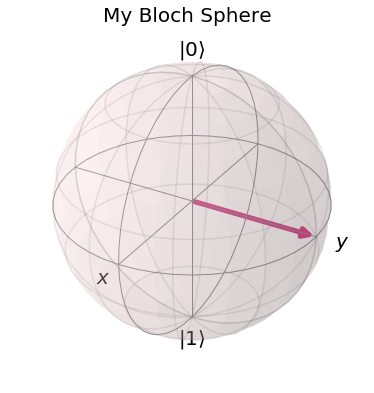

In [24]:
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

### Adjusting the output from plot_bloch_vector()

When using the `plot_bloch_vector` function it returns a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and renders it for us in this tutorial, but when running outside of jupyter you do not have this feature automatically. However, `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Or alternatively you can call `.savefig(out.png)` to save the figure to `out.png` in the current working directory. The `savefig()` takes a path so you can just the location and filename where you're saving the output.